In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

# Define constants
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 38

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

# Load the training dataset
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Tea Leaf Disease Datasets/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Get the number of classes from the training generator
num_classes = len(train_generator.class_indices)

# Create an ImageDataGenerator for data augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

# Load the validation dataset
validation_generator = val_datagen.flow_from_directory(
    '/content/drive/My Drive/Tea Leaf Disease Datasets/val',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Ensure the order of data is maintained
)

validation_steps = validation_generator.samples // BATCH_SIZE

model = Sequential([
    Conv2D(24, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

save_path = '/content/drive/My Drive/Colab Notebooks/tea_leaf_disease_model_with_early_stopping.h5'
# Loading the saved model using:
model.load_weights(save_path)
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.history


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 4693 images belonging to 6 classes.
Found 1173 images belonging to 6 classes.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 24)      672       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 24)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      13888     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the loaded model on validation data
validation_loss = []
validation_accuracy = []
validation_loss, validation_accuracy = model.evaluate(validation_generator, steps=validation_steps)
print(f'Validation Loss: {validation_loss:.4f}')
print(f'Validation Accuracy: {validation_accuracy:.4f}')


30/30 [==============================] - 67s 2s/step - loss: 0.1168 - accuracy: 0.9614
Validation Loss: 0.1168
Validation Accuracy: 0.9614


In [ ]:
# # Plot training and validation accuracy
# plt.plot(history['accuracy'], label='Training Accuracy')
# plt.plot(history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()
# plt.savefig('CNN_training_and_validation_accuracy.png')
# plt.show()
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 11.3 MB/s eta 0:00:00


In [ ]:
# Evaluate the model on the test dataset
test_generator = val_datagen.flow_from_directory(
    '/content/drive/My Drive/Tea Leaf Disease Datasets/val',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Ensure the order of data is maintained
)

loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test loss: {loss*100}%")
print(f"Test accuracy: {accuracy *100}%")


Found 1173 images belonging to 6 classes.
30/30 [==============================] - 68s 2s/step - loss: 0.1168 - accuracy: 0.9614
Test loss: 11.679517477750778%
Test accuracy: 96.1403489112854%


In [ ]:
val_steps = validation_generator.samples // validation_generator.batch_size
predictions = model.predict(validation_generator, steps=val_steps + 1)
y_true = validation_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))

31/31 [==============================] - 46s 1s/step
Accuracy: 0.9616
Precision: 0.9624
Recall: 0.9616
F1 Score: 0.9617

Classification Report:
               precision    recall  f1-score   support

   Algal Leaf       0.98      0.98      0.98       200
 Brown Blight       0.92      0.98      0.95       173
  Gray Blight       0.97      0.94      0.95       200
      Healthy       0.94      0.94      0.94       200
   Helopeltis       0.99      0.94      0.97       200
Red Leaf Spot       0.96      0.98      0.97       200

     accuracy                           0.96      1173
    macro avg       0.96      0.96      0.96      1173
 weighted avg       0.96      0.96      0.96      1173



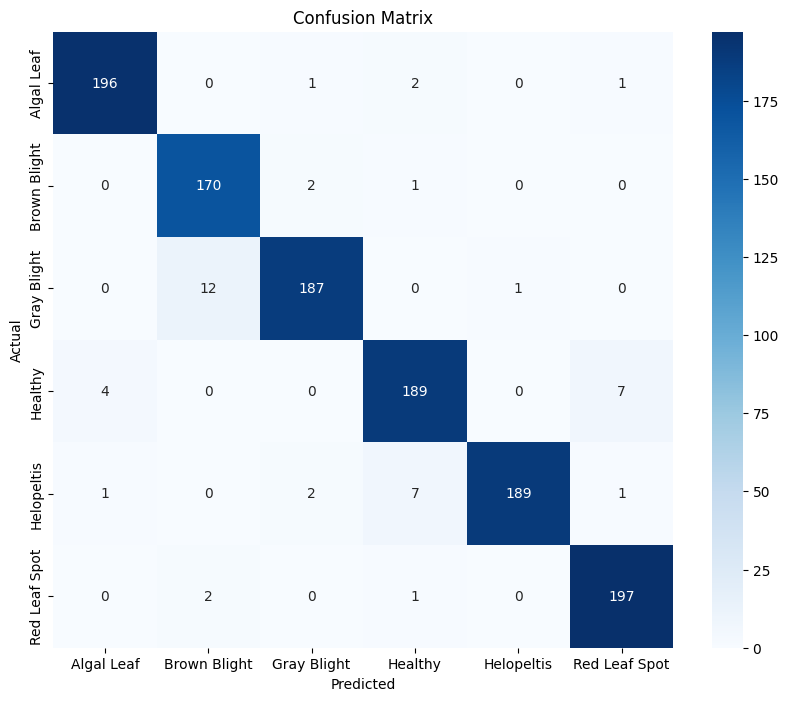

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
data = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('CNN_Confusion Matrix.png')
plt.show()


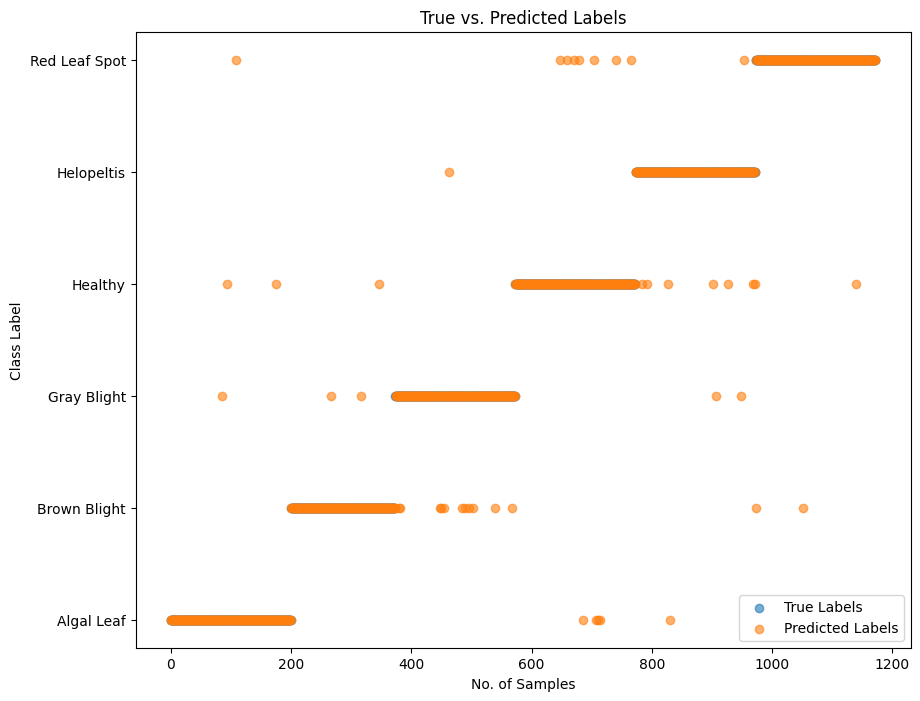

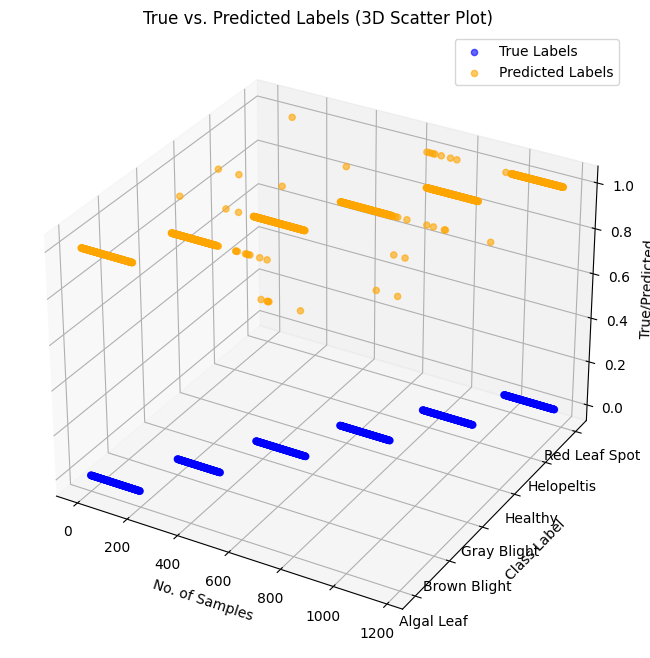

In [ ]:
# Plot True vs. Predicted Labels
plt.figure(figsize=(10, 8))
plt.scatter(range(len(y_true)), y_true, alpha=0.6, label='True Labels')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.6, label='Predicted Labels')
plt.legend()
plt.xlabel('No. of Samples')
plt.ylabel('Class Label')
plt.title('True vs. Predicted Labels')
plt.yticks(np.arange(len(validation_generator.class_indices.keys())), validation_generator.class_indices.keys())

# Optionally, save the True vs. Predicted Labels plot
plt.savefig('CNN_true_vs_predicted_labels.png')
plt.show()

# Plot True vs. Predicted Labels in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
ax.scatter(range(len(y_true)), y_true, zs=0, zdir='z', label='True Labels', c='blue', alpha=0.6)
ax.scatter(range(len(y_pred)), y_pred, zs=1, zdir='z', label='Predicted Labels', c='orange', alpha=0.6)

ax.set_xlabel('No. of Samples')
ax.set_ylabel('Class Label')
ax.set_zlabel('True/Predicted')
ax.set_title('True vs. Predicted Labels (3D Scatter Plot)')
ax.set_yticks(np.arange(len(validation_generator.class_indices.keys())), validation_generator.class_indices.keys())
ax.legend()

# Optionally, save the True vs. Predicted Labels plot
plt.savefig('CNN_true_vs_predicted_labels_3d.png')

plt.show()


# Make predictions on new data
# new_data = ...  # Load and preprocess new tea leaf images
# new_predictions = model.predict(new_data)
# print(new_predictions)

1/1 [==============================] - 0s 140ms/step


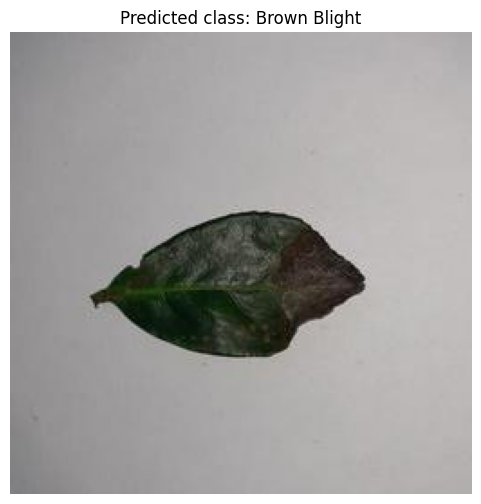

Predicted class: Brown Blight
Predictions: [[0.02219071 0.9280114  0.02663299 0.00335138 0.00260344 0.01721016]]


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import SimpleITK as sitk


# Function to preprocess a single image
def preprocess_image(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize pixel values
    return img

# Make predictions on new data
new_image_path = '/content/drive/My Drive/20211205_160355.jpg'
new_image = preprocess_image(new_image_path)
new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension

predictions = model.predict(new_image)
# Assuming the classes are ordered as follows: algal leaf, Anthracnose, bird eye spot, brown blight, gray light, healthy, red leaf spot, white spot
class_labels = ['Algal Leaf', 'Brown Blight', 'Gray Blight', 'Healthy','Helopeltis', 'Red Leaf Spot']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

plt.figure(figsize=(6, 6))
plt.imshow(new_image[0])
plt.axis('off')
plt.title(f"Predicted class: {predicted_class_label}")
plt.savefig('output.png')
plt.show()


print(f"Predicted class: {predicted_class_label}")
print(f"Predictions: {predictions}")


In [ ]:
!pip install requests
!pip install python-telegram-bot
!pip install asyncio
!pip install nest_asyncio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 1.2 MB/s eta 0:00:00


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

1/1 [==============================] - 0s 77ms/step


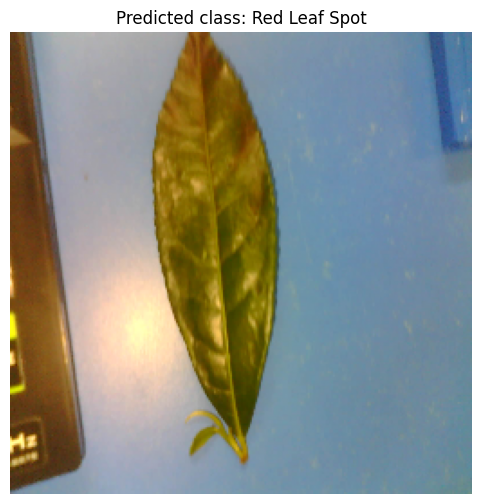

Predicted class: Red Leaf Spot
Predictions: [[9.5080850e-09 4.1950617e-02 4.8722130e-05 2.0324945e-08 3.2842369e-04
  9.5767218e-01]]


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests
import telegram
import asyncio
from io import BytesIO
import nest_asyncio
from tensorflow.keras.models import load_model

nest_asyncio.apply()

TOKEN = '7472559972:AAE3hHJXDMilVAmfnjIqrJejPJb2q2Q7Rvs'
CHAT_ID = '1175780035'
# MODEL_PATH = 'path_to_your_model.h5'  # Update this to the path of your model file

# # Load the pre-trained model
# model = load_model(MODEL_PATH)

async def send_photo(image_path):
    bot = telegram.Bot(token=TOKEN)
    with open(image_path, 'rb') as photo:
        await bot.send_photo(chat_id=CHAT_ID, photo=photo)

def fetch_image(image_url):
    response = requests.get(image_url)
    img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)
    return img

def preprocess_image(image, target_size=(256, 256)):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize pixel values
    return img

# URL of the new image
new_image_url = 'https://d510-2401-4900-7449-67c7-ec91-2d4e-951d-53cd.ngrok-free.app/saved-photo'

# Fetch and preprocess the image
new_image = fetch_image(new_image_url)
new_image_preprocessed = preprocess_image(new_image)
new_image_preprocessed = np.expand_dims(new_image_preprocessed, axis=0)  # Add batch dimension

# Make predictions on new data
predictions = model.predict(new_image_preprocessed)
# Assuming the classes are ordered as follows: algal leaf, Anthracnose, bird eye spot, brown blight, gray light, healthy, red leaf spot, white spot
class_labels = ['Algal Leaf', 'Brown Blight', 'Gray Blight', 'Healthy', 'Helopeltis', 'Red Leaf Spot']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Plot the image with the prediction
plt.figure(figsize=(6, 6))
plt.imshow(new_image_preprocessed[0])
plt.axis('off')
plt.title(f"Predicted class: {predicted_class_label}")
plt.savefig('output.png')
plt.show()

print(f"Predicted class: {predicted_class_label}")
print(f"Predictions: {predictions}")

# Send the result to the Telegram bot
asyncio.get_event_loop().run_until_complete(send_photo("output.png"))
